In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

In [13]:
x_min, x_max = 0, 25
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    x = np.expand_dims(x, axis=1) # (N,1)
    ret = np.hstack([x**i for i in range(1, feature_num+1)])
    return ret

def gaussian_basis(x, feature_num=10):
    x = np.expand_dims(x, axis=1)
    means = np.linspace(x_min, x_max, feature_num)
    std_dev = (x_max - x_min) / feature_num
    ret = np.exp(-0.5 * ((x - means) / std_dev) ** 2)
    return ret

In [17]:
def main(x_train, y_train):
    basis_func = gaussian_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)
    
    w_ls = np.linalg.lstsq(phi, y_train, rcond=None)[0]
    learning_rate = 0.001
    epochs = 1000
    w_gd = np.random.randn(phi.shape[1])
    
    for _ in range(epochs):
        error = np.dot(phi, w_gd) - y_train
        gradient = 2 * np.dot(phi.T, error)
        w_gd -= learning_rate * gradient
    
    w = w_ls
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

(300,)
(200,)
训练集预测值与真实值的标准差：0.5
预测值与真实值的标准差：0.6


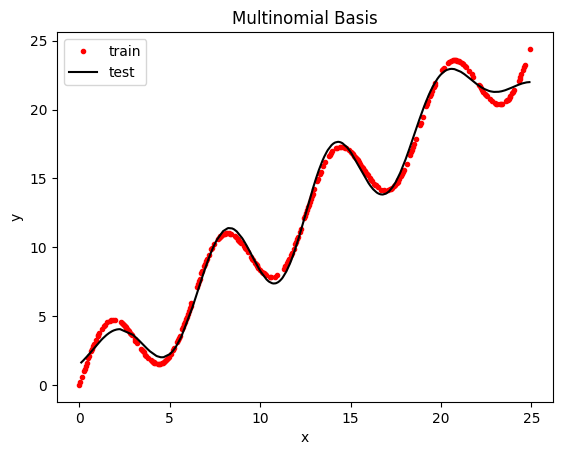

In [16]:
def evaluate(ys, ys_pred):
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    y_test_pred = f(x_test)
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Multinomial Basis')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

(300,)
(200,)
训练集预测值与真实值的标准差：0.5
预测值与真实值的标准差：0.6


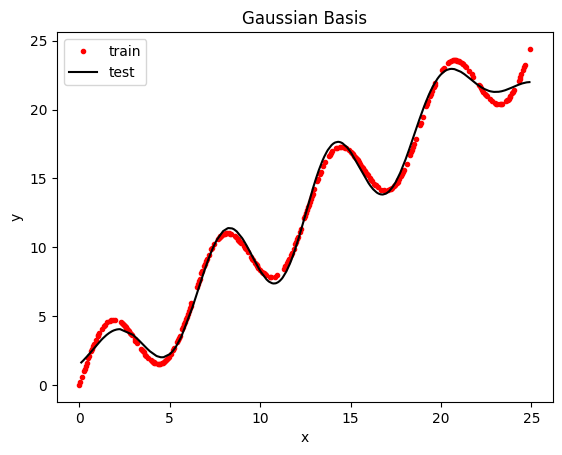

In [18]:
def evaluate(ys, ys_pred):
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    y_test_pred = f(x_test)
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gaussian Basis')
    plt.legend(['train', 'test', 'pred'])
    plt.show()